In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix


In [ ]:
from bidict import bidict

ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26,
    'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32,
    'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38,
    'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44,
    's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50,
    'y': 51, 'z': 52,
    '0': 53, '1': 54, '2': 55, '3': 56, '4': 57,
    '5': 58, '6': 59, '7': 60, '8': 61, '9': 62,
    'AM':63,'GLA':64,'One':65,'Two':66
})



In [17]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(680,)

In [18]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(680, 50, 50)

In [20]:
imgs = np.expand_dims(imgs, -1)

In [21]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [22]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [23]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [24]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.0233 - loss: 4.2338 - val_accuracy: 0.0765 - val_loss: 3.9322
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2655 - loss: 3.1182 - val_accuracy: 0.6353 - val_loss: 1.5270
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7866 - loss: 0.8587 - val_accuracy: 0.7059 - val_loss: 1.0908
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8975 - loss: 0.4102 - val_accuracy: 0.8059 - val_loss: 1.0522
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9484 - loss: 0.2176 - val_accuracy: 0.8353 - val_loss: 0.9456
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9780 - loss: 0.0607 - val_accuracy: 0.8176 - val_loss: 1.0642
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9628 - loss: 0.1210 - val_accuracy: 0.8588 - val_loss: 0.9106
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9797 - loss: 0.0698 - val_accuracy: 0.8412 - val_loss:

In [25]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step


In [26]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

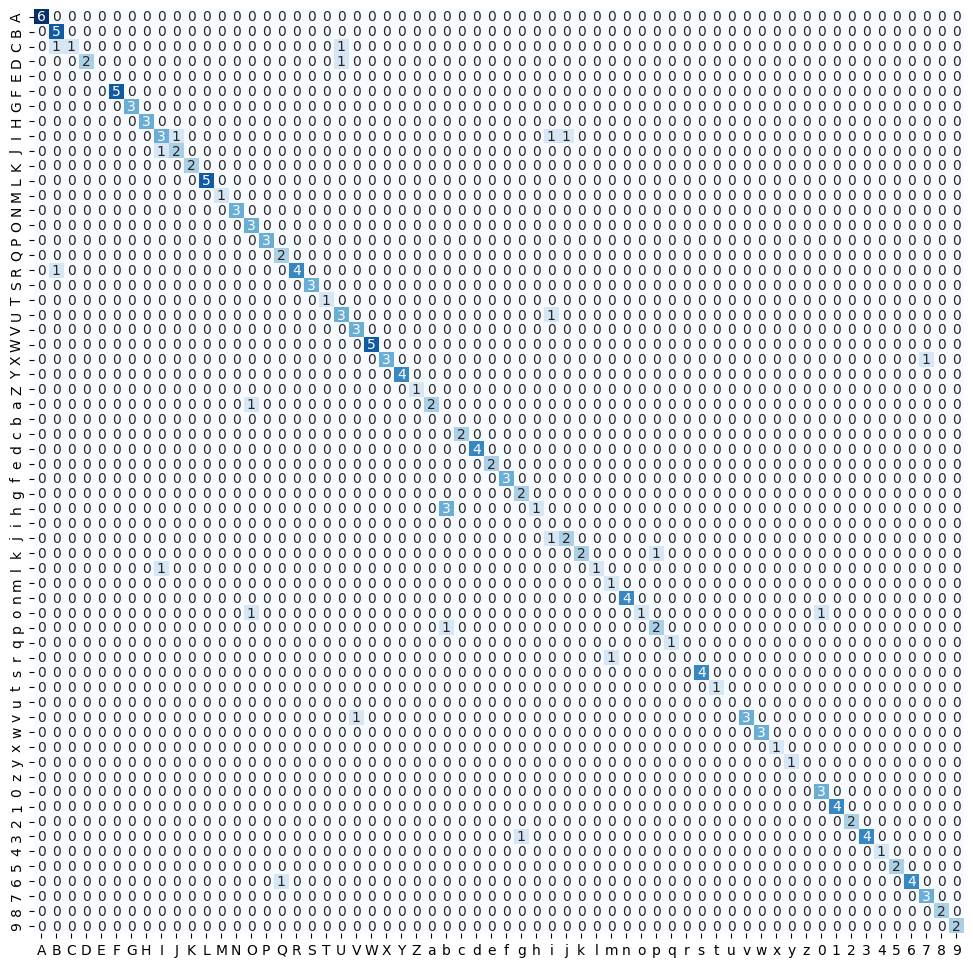

In [27]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [28]:
model.save('../letter.h5')